In [2]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import yfinance as yf
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock quote
df = yf.download('TSLA', start='2011-07-01', end='2023-7-30')#show the data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-01,1.938000,1.973333,1.920000,1.934667,1.934667,12823500
2011-07-05,1.934667,1.968000,1.914000,1.942667,1.942667,14940000
2011-07-06,1.942667,1.942667,1.903333,1.930667,1.930667,13903500
2011-07-07,1.942667,2.000000,1.934000,1.982000,1.982000,19918500
2011-07-08,1.992667,1.992667,1.906000,1.920667,1.920667,18609000
...,...,...,...,...,...,...
2023-07-24,255.850006,269.850006,254.119995,269.059998,269.059998,136508500
2023-07-25,272.380005,272.899994,265.000000,265.279999,265.279999,112757300
2023-07-26,263.250000,268.040009,261.750000,264.350006,264.350006,95856200


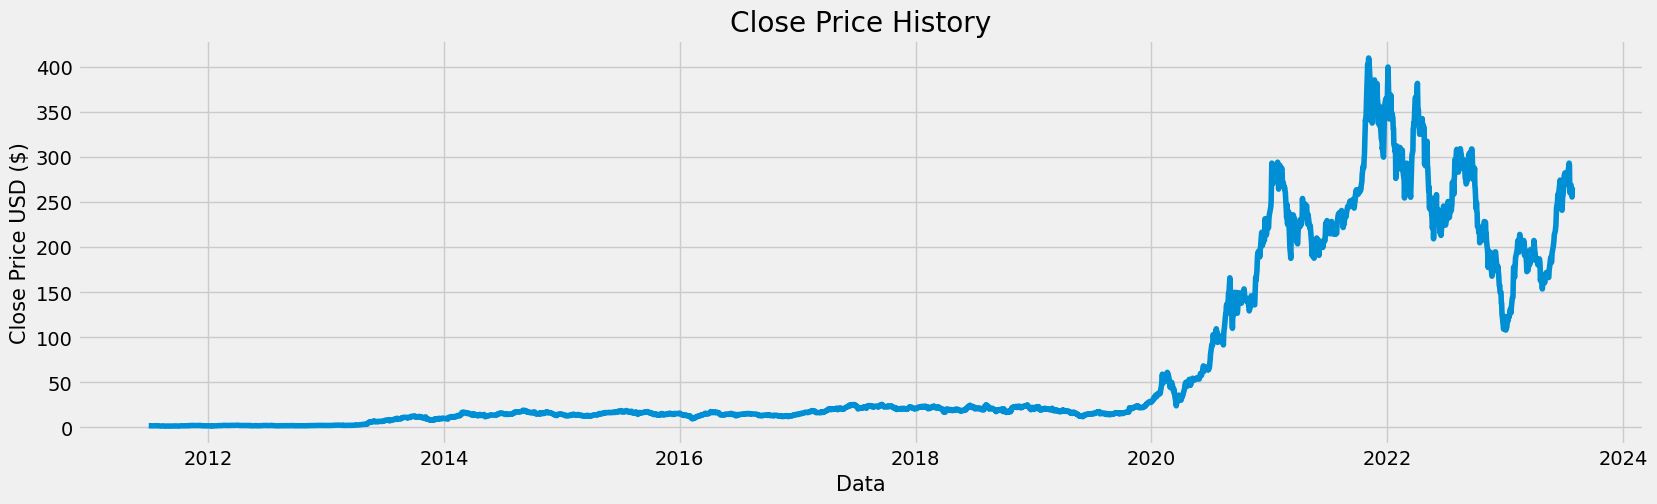

In [5]:
#Visualize the closing price history
plt.figure(figsize=(18,5))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Data', fontsize=15 )
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.show()

In [6]:
#Create a dataframe with only the 'Create Column
data= df.filter(['Close'])
#convert the dataframe to a numpy array
dataset= data.values
#get the number of rows to train the model on
training_data_len= math.ceil(len(dataset)* 0.85)
training_data_len
#data.shape

2583

In [7]:
#Scale the all of the data to be values between 0 and 1 
scaler= MinMaxScaler(feature_range=(0,1))
scaled_data= scaler.fit_transform(dataset)
scaled_data

array([[0.0011538 ],
       [0.00117338],
       [0.00114401],
       ...,
       [0.64353092],
       [0.62238072],
       [0.64864711]])

In [8]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(180,len(train_data)):
    x_train.append(train_data[i-180:i,0])
    y_train.append(train_data[i,0])

    if i<=180:
      print(x_train)
      print(y_train)
      print()
#print(len(x_train[0]))
#train_data

[array([1.15379752e-03, 1.17338108e-03, 1.14400588e-03, 1.26966589e-03,
       1.11952650e-03, 1.04445535e-03, 1.01508015e-03, 1.09178139e-03,
       9.23691161e-04, 9.18795343e-04, 8.61675036e-04, 9.69384489e-04,
       1.09994294e-03, 1.10157332e-03, 1.19786046e-03, 1.06730201e-03,
       9.87337669e-04, 9.28586979e-04, 1.01508015e-03, 1.01508015e-03,
       1.11299768e-03, 8.79628217e-04, 8.56779218e-04, 4.56949617e-04,
       3.73719837e-04, 2.75802021e-04, 5.07541389e-04, 3.05177512e-04,
       5.46708223e-04, 7.11535357e-04, 6.98480620e-04, 6.77264340e-04,
       6.33201395e-04, 3.76982938e-04, 5.71203071e-05, 0.00000000e+00,
       1.64829468e-04, 3.13336430e-04, 1.89309141e-04, 2.90489766e-04,
       4.50421081e-04, 4.37366053e-04, 4.55316899e-04, 3.34552711e-04,
       1.82780314e-04, 1.61564033e-04, 3.08440612e-04, 2.70906203e-04,
       1.66459851e-04, 1.51772397e-04, 3.47607447e-04, 3.90040008e-04,
       4.68374262e-04, 6.28305577e-04, 6.23409759e-04, 6.62576594e-04,
     

In [9]:

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2403, 180, 1)

In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [12]:

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2403/2403 [==============================] - 44s 18ms/step - loss: 8.0747e-04


In [14]:
#Test data set
test_data = scaled_data[training_data_len - 180: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 
for i in range(180,len(test_data)):
    x_test.append(test_data[i-180:i,0])

In [15]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [16]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [17]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)
#Undo scaling

15/15 [==============================] - 0s 11ms/step


In [18]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

27.686158355222418

/var/folders/9r/flfzkryx2yvgk0hgxphjzvxm0000gn/T/ipykernel_60004/3590450730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


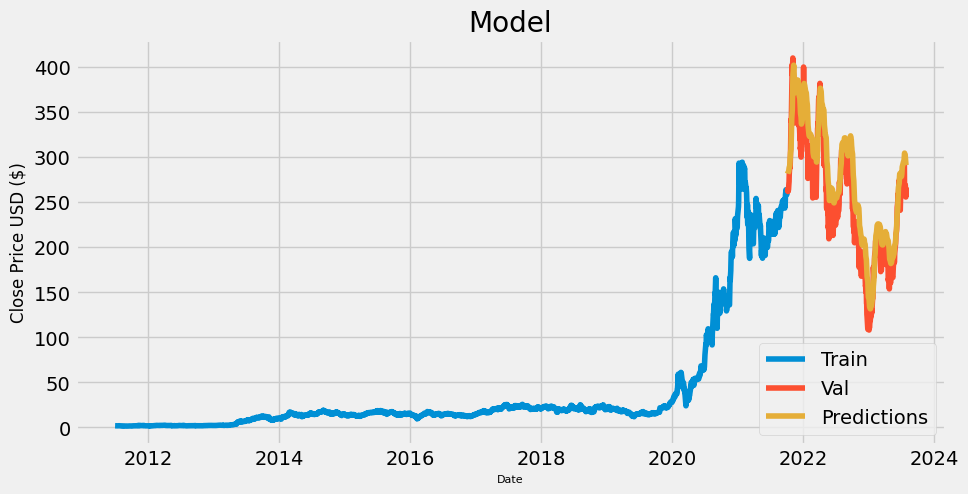

In [19]:
#Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid

,Close,Predictions
Date,,
2021-10-06,260.916656,264.409546
2021-10-07,264.536682,264.908203
2021-10-08,261.829987,265.654114
2021-10-11,263.980011,266.194489
2021-10-12,268.573334,266.783020
...,...,...
2023-07-24,269.059998,282.327393
2023-07-25,265.279999,280.419464
2023-07-26,264.350006,278.380188


In [20]:
#Get the quote
tesla_quote = yf.download('TSLA', start='2011-07-01', end='2023-7-30')
#Create a new dataframe
new_df = tesla_quote.filter(['Close'])
#Get the last 180 day closing price 
last_180_days = new_df[-180:].values
#Scale the data to be values between 0 and 1
last_180_days_scaled = scaler.transform(last_180_days)
#Create an empty list
X_test = []
#Append teh past 180 days
X_test.extend(last_180_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%***********************]  1 of 1 completed
6/6 [==============================] - 0s 580us/step
[[61.94785 ]
 [60.350464]
 [61.880234]
 [62.492535]
 [61.90705 ]
 [62.311718]
 [61.437267]
 [61.000313]
 [60.653206]
 [59.219494]
 [59.45675 ]
 [61.003807]
 [60.96419 ]
 [60.97118 ]
 [60.72775 ]
 [62.34437 ]
 [62.34437 ]
 [62.363033]
 [60.916443]
 [60.610123]
 [59.937252]
 [59.86743 ]
 [60.52046 ]
 [59.213676]
 [58.415115]
 [57.933044]
 [58.03408 ]
 [57.170383]
 [57.12862 ]
 [55.72924 ]
 [55.702602]
 [54.28817 ]
 [54.033783]
 [52.411022]
 [52.827656]
 [53.880024]
 [54.037247]
 [52.295643]
 [52.93502 ]
 [52.554108]
 [52.86806 ]
 [53.6431  ]
 [53.536793]
 [54.041874]
 [54.081184]
 [53.94707 ]
 [54.998566]
 [54.684944]
 [54.498676]
 [55.221977]
 [56.4188  ]
 [56.435028]
 [56.49763 ]
 [58.336105]
 [60.386562]
 [59.078796]
 [59.841835]
 [60.795296]
 [61.59461 ]
 [61.793953]
 [62.35137 ]
 [62.590527]
 [63.113346]
 [63.817432]
 [62.599865]
 [62.337383]
 [64.04288 ]
 [64.62

In [21]:
#Get the quote
tesla_quote2 = yf.download('TSLA', start='2022-07-30', end='2023-07-30')
print(tesla_quote2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2022-08-01    297.276672
2022-08-02    300.586670
2022-08-03    307.396667
2022-08-04    308.633331
2022-08-05    288.170013
                 ...    
2023-07-24    269.059998
2023-07-25    265.279999
2023-07-26    264.350006
2023-07-27    255.710007
2023-07-28    266.440002
Name: Close, Length: 250, dtype: float64


In [28]:
# Assuming the date today is 2022-07-30
# Get the quote for the next 180 days starting from 2022-07-30
next_180_days_quote = yf.download('TSLA', start='2023-02-02', end='2023-07-30')
next_180_days_data = next_180_days_quote.filter(['Close'])
next_180_days_dataset = next_180_days_data.values
print(len(next_180_days_dataset))


# Scale the data to be values between 0 and 1
next_180_days_scaled = scaler.transform(next_180_days_dataset)

# Create an empty list to store the predicted prices
predicted_prices = []

# Append the past 180 days (using next_180_days_scaled) to X_test
X_test = []
X_test.append(next_180_days_scaled)

# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
print(X_test.shape)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted scaled price for the next 180 days
for i in range(10):
    pred_price = model.predict(X_test)
    # Undo the scaling
    pred_price = scaler.inverse_transform(pred_price)
    # Append the predicted price to the list
    X_test
    predicted_prices.append(pred_price[0, 0])
    # Update X_test for the next prediction
    X_test = np.roll(X_test, -1, axis=1)
    X_test[0, -1, 0] = pred_price

# Convert the list of predicted prices to a NumPy array
predicted_prices = np.array(predicted_prices)

# Print the predicted prices for the next 180 days
print(predicted_prices)


[*********************100%***********************]  1 of 1 completed
122
(1, 122, 1)
1/1 [==============================] - 0s 10ms/step
[289.5552  575.25323 737.411   822.2562  866.1095  888.73846 900.2181
 905.79144 908.24396 909.07654]


In [29]:
date_range = pd.date_range(start='2022-07-30', periods=10)

# Convert the list of predicted prices to a NumPy array
predicted_prices = np.array(predicted_prices)

# Create a DataFrame to store the predicted prices with dates
predicted_df = pd.DataFrame({'Date': date_range, 'Predicted Prices': predicted_prices})
predicted_df.set_index('Date', inplace=True)

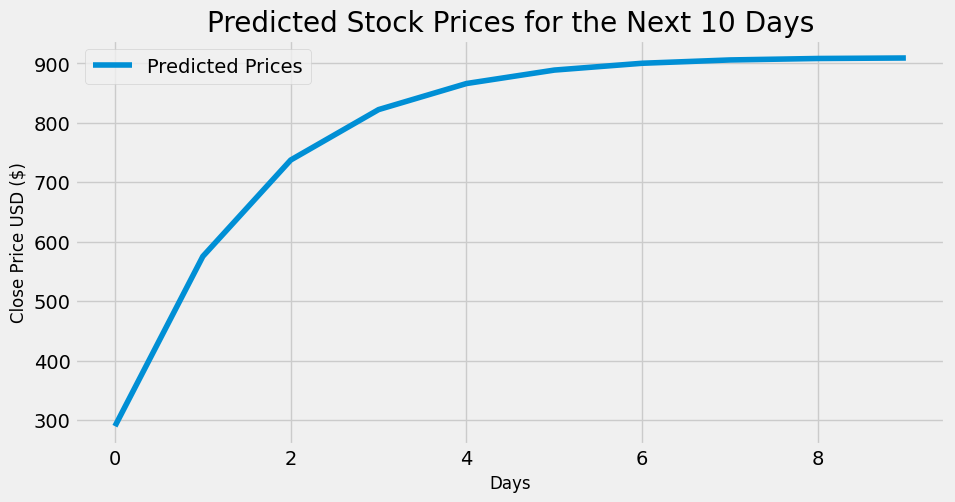

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Predicted Stock Prices for the Next 10 Days')
plt.xlabel('Days', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(predicted_prices, label='Predicted Prices')
plt.legend(loc='upper left')
plt.show()